# Linear Regression,Ridge And Lasso

### pip install scikit-learn

In [2]:
## House Pricing dataset

from sklearn.datasets import load_boston

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
df = load_boston()

C:\Users\extrusion115\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets incl

In [15]:
# data_url = "http://lib.stat.cmu.edu/datasets/boston"
# raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
# data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
# target = raw_df.values[1::2, 2]

In [34]:
df

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [36]:
dataset = pd.DataFrame(df.data)
dataset.columns=df.feature_names

dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [38]:
## add dependend feature 

dataset['price']=df.target

dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [44]:
## dividing the dataset into independed and depended deafture

X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [45]:
## linear regression

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lin_reg = LinearRegression()

## cross validation

mse=cross_val_score(lin_reg,X,y,scoring='neg_mean_squared_error',cv=5)
mean_mse = np.mean(mse)
mean_mse

-37.13180746769914

In [54]:
## Ridge Regression

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
params = {'alpha':[1e-15,1e-10,1e-8,1e-2,1,5,10,20,30,40,45,50,55,100]}

ridge_regressor =GridSearchCV(ridge,params,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X,y)




GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.01, 1, 5, 10, 20, 30,
                                   40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [55]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 100}
-29.9057019475404


In [56]:
## Lasso Regression

from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso = Lasso()
params = {'alpha':[1e-15,1e-10,1e-8,1e-2,1,5,10,20,30,40,45,50,55,100]}

lasso_regressor =GridSearchCV(lasso,params,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(X,y)

C:\Users\extrusion115\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.633e+03, tolerance: 3.919e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\extrusion115\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.764e+03, tolerance: 3.307e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\extrusion115\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.01, 1, 5, 10, 20, 30,
                                   40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [57]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1}
-35.53158022069486


In [59]:
## best way to use train and test split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.33,random_state=42)


In [68]:
## linear regression

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
## cross validation

mse=cross_val_score(lin_reg,X_train,y_train,scoring='neg_mean_squared_error',cv=5)
mean_mse = np.mean(mse)
mean_mse

-25.187874739285125

In [61]:
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.01, 1, 5, 10, 20, 30,
                                   40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [62]:
lasso_regressor.fit(X_train,y_train)

C:\Users\extrusion115\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.729e+03, tolerance: 2.284e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\extrusion115\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.558e+03, tolerance: 2.493e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\extrusion115\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.01, 1, 5, 10, 20, 30,
                                   40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [63]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 0.01}
-25.186899367386978


In [64]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1e-15}
-25.18787473928503


In [67]:
y_pred = lasso_regressor.predict(X_test)

from sklearn.metrics import r2_score

r2_score1 = r2_score(y_pred,y_test)

r2_score1

0.670955897674443

In [69]:
y_pred = ridge_regressor.predict(X_test)

from sklearn.metrics import r2_score

r2_score2 = r2_score(y_pred,y_test)

r2_score2

0.670874325753307

In [71]:
y_pred = lin_reg.predict(X_test)

from sklearn.metrics import r2_score

r2_score3 = r2_score(y_pred,y_test)

r2_score3

0.6709558976744423

# Logistic Regression

In [72]:
from sklearn.linear_model import LogisticRegression

In [73]:
from sklearn.datasets import load_breast_cancer

In [74]:
df = load_breast_cancer()
X = pd.DataFrame(df.data,columns=df.feature_names)
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [77]:
## Dependent feature

y=pd.DataFrame(df['target'],columns=['target'])

y

,target
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [78]:
y['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

In [79]:
## Train split test

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.33,random_state=42)

In [113]:
para = [{'C':[1,5,10]},{'max_iter':[100,500]}]

In [124]:
model1 = LogisticRegression(C=100, max_iter=100)

In [125]:
model = GridSearchCV(model1,param_grid=para,scoring='f1',cv=2)
model.fit(X_train,y_train)

C:\Users\extrusion115\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\extrusion115\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\extrusion115\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-

C:\Users\extrusion115\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=2, estimator=LogisticRegression(C=100),
             param_grid=[{'C': [1, 5, 10]}, {'max_iter': [100, 500]}],
             scoring='f1')

In [126]:
model.best_params_

{'max_iter': 500}

In [127]:
model.best_score_

0.9809590216691697

In [130]:
y_pred = model.predict(X_test)


In [132]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [131]:
confusion_matrix(y_pred,y_test)

array([[ 64,   5],
       [  3, 116]], dtype=int64)

In [133]:
accuracy_score(y_test,y_pred)

0.9574468085106383

In [135]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94        67
           1       0.97      0.96      0.97       121

    accuracy                           0.96       188
   macro avg       0.95      0.96      0.95       188
weighted avg       0.96      0.96      0.96       188



In [27]:
df = pd.read_csv("FILES/Simple linear regression.csv")
df.shape

(84, 2)

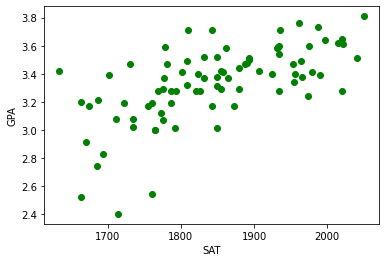

In [31]:
plt.scatter(df.iloc[:,0],df.iloc[:,1],color="g")
plt.xlabel('SAT')
plt.ylabel('GPA')
plt.show()

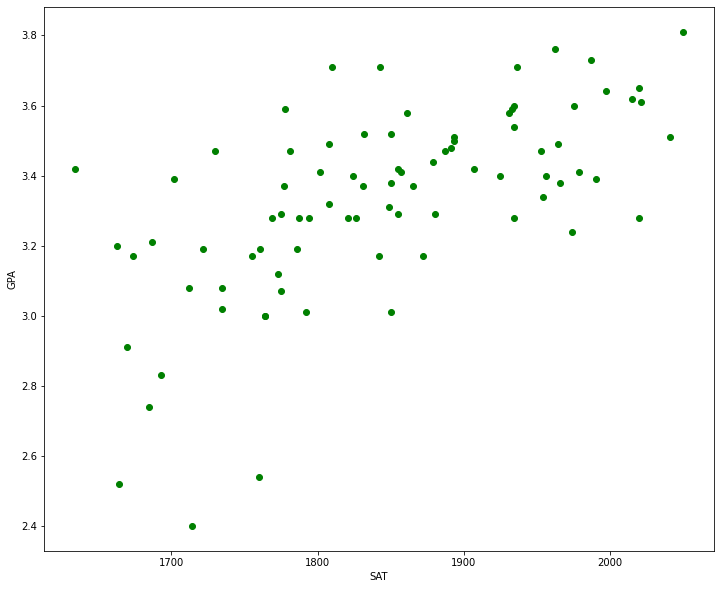

In [25]:
Independent_Variable = df.iloc[:,0]
Dependent_Variable = df.iloc[:,1]

plt.figure(figsize=(12, 10))
plt.scatter(Independent_Variable, Dependent_Variable, color='green')
plt.xlabel('SAT')
plt.ylabel('GPA')
plt.show()


In [24]:
LR=0.001
m=0
c=0
epoch=0

while epoch<1100:
    epoch=epoch+1
    counter=0
    
    for x in Independent_Variable:
        
        yhat=(m*x)+c
        error=yhat-Dependent_Variable[counter]
        c=c-(LR*error)
        m=m-(LR*error*x)
        counter=counter+1


        

C:\Users\extrusion115\AppData\Local\Temp\ipykernel_7988\640096262.py:12: RuntimeWarning: overflow encountered in double_scalars
  yhat=(m*x)+c
C:\Users\extrusion115\AppData\Local\Temp\ipykernel_7988\640096262.py:14: RuntimeWarning: invalid value encountered in double_scalars
  c=c-(LR*error)
C:\Users\extrusion115\AppData\Local\Temp\ipykernel_7988\640096262.py:15: RuntimeWarning: invalid value encountered in double_scalars
  m=m-(LR*error*x)


In [23]:
print("The final value of m", m)
print("The final value of c", c)

The final value of m nan
The final value of c nan


In [ ]:
plt.figure(figsize=(12, 10))
plt.scatter(Independent_Variable, Dependent_Variable, color='green')
plt.plot(Independent_Variable, m*Dependent_Variable+c)
plt.xlabel('Independent Variable/Input Parameter')
plt.ylabel('Dependent Variable/ Output Parameter')
plt.show()


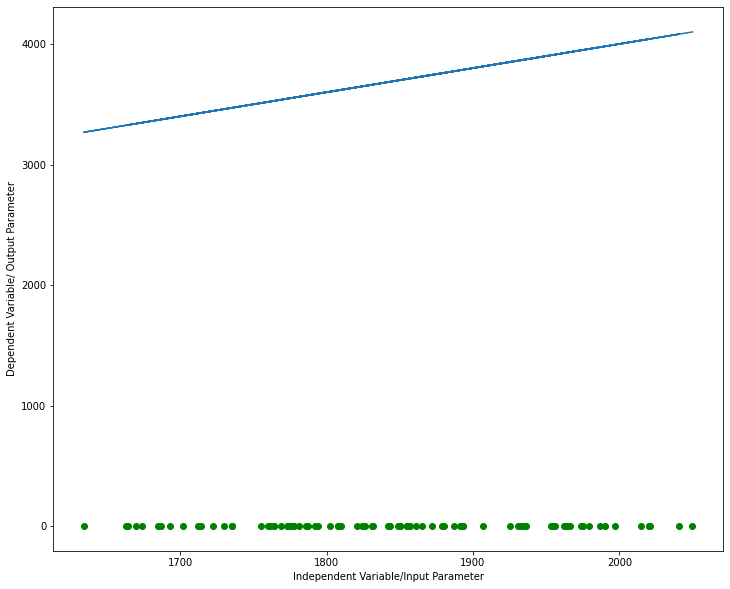

In [20]:
m, b = 2,0
plt.figure(figsize=(12, 10))
plt.scatter(Independent_Variable, Dependent_Variable, color='green')
plt.plot(Independent_Variable, m*Independent_Variable+b)
plt.xlabel('Independent Variable/Input Parameter')
plt.ylabel('Dependent Variable/ Output Parameter')
plt.show()



In [209]:
# Code source: Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [210]:
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True) #,as_frame=True

In [223]:
diabetes_y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [231]:
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True,as_frame=True)

diabetes_X.drop(diabetes_X.loc[('s1','s2','s3','s4','s5','s6')],axis=1)

IndexingError: Too many indexers

In [240]:
diabetes_X.drop(diabetes_X.loc[:,['s1','s2','s3','s4','s5','s6']],axis=1,inplace=True)

In [242]:
diabetes_X['diabatic']=diabetes_y


In [243]:
diabetes_X

,age,sex,bmi,bp,diabatic
0,0.038076,0.050680,0.061696,0.021872,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,75.0
2,0.085299,0.050680,0.044451,-0.005670,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,206.0
4,0.005383,-0.044642,-0.036385,0.021872,135.0
...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,104.0
439,0.041708,0.050680,-0.015906,0.017293,132.0
440,-0.045472,-0.044642,0.039062,0.001215,220.0


In [211]:
# diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True,as_frame=True)

# Use only one "bmi" feature
## (442,10)2D convert into 1D and consider only second column "bmi" 


diabetes_X = diabetes_X[:, np.newaxis,2]  


In [212]:
# Split the data into training/testing sets

diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

In [213]:
# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

In [214]:
# Create linear regression object
regr = linear_model.LinearRegression()

In [215]:
# Train the model using the training sets

regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression()

In [216]:
# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

In [219]:
# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred,squared=True))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


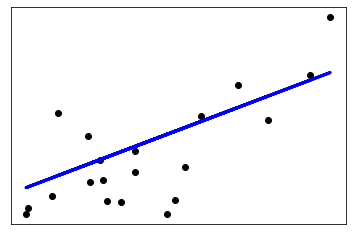

In [222]:
# Plot outputs

plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()